# Introduction

# Business Understanding

The company is expanding in to new business industries to diversify its portfolio. They are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. They require information to assits them in determining which Airplanes are the lowest risk for the company to start this new business endeavor. 

## Main Objective

 The objective is to translate the findings into actionable insights that the head of the new aviation division can use to help decide which airplane to purchase.

# Data Understanding



## Description
This dataset is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## Attributes
This dataset has 31 attributes and 88889 entries.
Entries contain details of accidents that have occured with a range of year. The entry data ranges from the make and model of the aircrafts to the injuries of the passagers and the location the accidents happened.

# Data Importation

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the data
df = pd.read_csv('AviationData.csv', encoding=('ISO-8859-1'), low_memory=False )

# Previewing the top of our dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Previewing the bottom of our dataset
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Data Cleaning

### Validity

In this section, we are checking if the data is in line with the objective

In [5]:
# Accessing data with only Airplanes
df = df.loc[df['Aircraft.Category']=='Airplane', :]

The dataset had a wide range of aircrafts, so I specified to only airplanes. As per the Objective

In [6]:
# Creating a dataframe of recommended data
df = df.loc[:,['Event.Id','Event.Date','Make', 'Model','Purpose.of.flight']]


Because of the wide range of 31 columns by which most of them were irrelevant to the analysis, reduction was necessary.

### Completeness

Checking if the data has all the necessary parts

In [7]:
#Checking for Missing data
df.isna().sum()

Event.Id                0
Event.Date              0
Make                    9
Model                  31
Purpose.of.flight    3739
dtype: int64

In [8]:
# Dealing with the Missing Data
df = df.dropna()
df

,Event.Id,Event.Date,Make,Model,Purpose.of.flight
7,20020909X01562,1982-01-01,Cessna,140,Personal
8,20020909X01561,1982-01-01,Cessna,401B,Business
12,20020917X02148,1982-01-02,Bellanca,17-30A,Personal
13,20020917X02134,1982-01-02,Cessna,R172K,Personal
14,20020917X02119,1982-01-02,Navion,A,Personal
...,...,...,...,...,...
88861,20221215106460,2022-12-10,CESSNA,305A,Personal
88865,20221212106444,2022-12-12,CESSNA,172,Instructional
88873,20221215106463,2022-12-14,CIRRUS DESIGN CORP,SR22,Personal
88877,20221219106470,2022-12-16,CESSNA,R172K,Personal


Removed all rows with NaN values to attain completeness of the dataset

### Consistency

In [9]:
# Checking For Duplicates
df.duplicated().sum()

6

In [10]:
# Dealing with Duplicates
df = df.drop_duplicates()
df

,Event.Id,Event.Date,Make,Model,Purpose.of.flight
7,20020909X01562,1982-01-01,Cessna,140,Personal
8,20020909X01561,1982-01-01,Cessna,401B,Business
12,20020917X02148,1982-01-02,Bellanca,17-30A,Personal
13,20020917X02134,1982-01-02,Cessna,R172K,Personal
14,20020917X02119,1982-01-02,Navion,A,Personal
...,...,...,...,...,...
88861,20221215106460,2022-12-10,CESSNA,305A,Personal
88865,20221212106444,2022-12-12,CESSNA,172,Instructional
88873,20221215106463,2022-12-14,CIRRUS DESIGN CORP,SR22,Personal
88877,20221219106470,2022-12-16,CESSNA,R172K,Personal


Removed all duplicated in the dataset.

# Exploratory Data Analysis

Text(0.5, 1.0, 'Number of Accidents per Top Airplane Make')

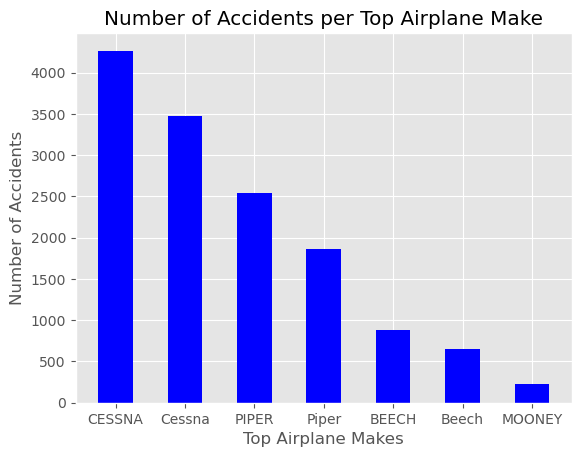

In [11]:
# Identifying the number of accidents each airplane make happened
names = df['Make'].value_counts().head(7).keys()
names_value = df['Make'].value_counts().head(7)  

# Plotting a bar graph to visualize the data
style.use('ggplot')
plt.bar(names, names_value, color = 'blue', width=0.5)
plt.xlabel('Top Airplane Makes')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Top Airplane Make')

From the plot shown above:

        1. Cessna has had the most accindents
        2. Mooney has had the least number of accidents

Text(0.5, 1.0, 'Purpose of the Airplanes')

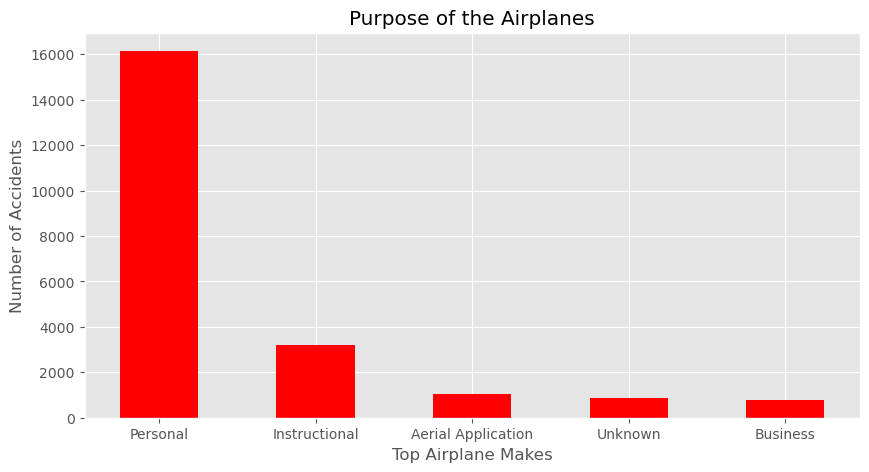

In [12]:
# Identifying the purpose of the airplane when the accidents occured
purpose = df['Purpose.of.flight'].value_counts().head().keys()
purpose_value = df['Purpose.of.flight'].value_counts().head()

# Plotting a bar graph to visualize the data
style.use('ggplot')
plt.figure(figsize=(10,5))
plt.bar(purpose, purpose_value, color = 'red', width=0.5)
plt.xlabel('Top Airplane Makes')
plt.ylabel('Number of Accidents')
plt.title('Purpose of the Airplanes')

From the analysis we can conclude that most of the flights that most of the accidents occured while on the airplanes were being used for personal activities.

# Conclusion

In this section, the aim is to summarize the finding from the analysis.
From the analysis we can derive that:

1. The Cessna made aiplanes have the most accidents compared to the rest while the Mooney made airplanes have the least accidents.
2. In terms of the purpose of the airplanes those used for personal activity are likely to be involved in an accident.

# Recommendation

From the finding above, my recommendations are : 

   1. The business is to prioritize in purchasing the Mooney made airplanes. This is because they have a lower risk of being involved in an accidents as compared to the other models.
   2. Airplanes bought should to prioritized for business purposes, meaning stricter use and higher supervision. 